## Question 1 - Multinomial Sampling
***

In [2]:
import random


def _sample_multinomial():
    boundaries = {
        0.2: "Movies",
        0.6: "COMP-551",
        0.7: "Playing",
        1.0: "Studying"
    }

    generated = random.random()
    boundary_list = list(boundaries.keys())
    for index, g in enumerate(boundary_list):
        if index == 0:
            if g > generated > 0:
                return boundaries[g]
        else:
            if g > generated > boundary_list[index - 1]:
                return boundaries[g]


def repeated_samples(num: int):

    results = {
        "Movies": 0,
        "COMP-551": 0,
        "Playing": 0,
        "Studying": 0
    }
    for i in range(num):
        results[_sample_multinomial()] += 1

    fraction_results = {
    }

    for r in results:
        fraction_results[r] = results[r] / num

    return fraction_results


if __name__ == '__main__':
    probabilities = {
        "Movies": 0.2,
        "COMP-551": 0.4,
        "Playing": 0.1,
        "Studying": 0.3
    }
    print("Sampling 100 times:")
    sum=0
    for k, v in repeated_samples(100).items():
        print(" {} : {:.2f} ( {:.2f} %)".format(k, v, 100*((v-probabilities[k])/probabilities[k])))
        sum += 100*((v-probabilities[k])/probabilities[k])
    print("Average Error: {:.2f}%".format(sum/4))
    print("\nSampling 1000 times: ")
    for k, v in repeated_samples(1000).items():
        print(" {} : {:.2f} ( {:.2f} %)".format(k, v, 100*((v-probabilities[k])/probabilities[k])))
        sum += 100 * ((v - probabilities[k]) / probabilities[k])
    print("Average Error: {:.2f}%".format(sum/4))

Sampling 100 times:
 Movies : 0.10 ( -50.00 %)
 COMP-551 : 0.34 ( -15.00 %)
 Playing : 0.13 ( 30.00 %)
 Studying : 0.43 ( 43.33 %)
Average Error: 2.08%

Sampling 1000 times: 
 Movies : 0.19 ( -5.50 %)
 COMP-551 : 0.37 ( -7.75 %)
 Playing : 0.12 ( 20.00 %)
 Studying : 0.32 ( 7.33 %)
Average Error: 5.60%


## Question 2 - Model Selection


### Question 2.1 - No Regularization:

**Visualizing without Validation Predictions:**

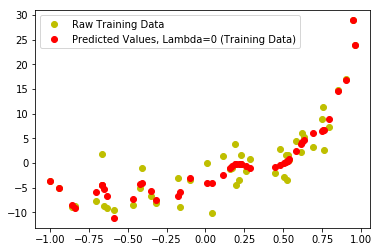

Training Data MSE:
6.4750601542578305
Validation Data MSE:
1415.7667845050064


In [7]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_file(fp):
    """
    Read in a csv file and return numpy arrays for x and y values.
    :param fp:
    :return:
    """
    x = []
    y = []
    with open(fp, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return np.array(x), np.array(y)


def exponential(x, deg):
    """
    Constructs polynomial matrix from input vector.
    """
    matrix = []
    for i in x:
        list = []
        for j in range(deg+1):
            list.append(i ** j)
        matrix.append(list)
    matrix = np.array(matrix)
    return matrix


def computeparametres(x, y, lmb, deg):
    """
    Fit data into a polynomial and calculate the co-effecients (model parametres)
    :param x:
    :param y:
    :param lmb:
    :param deg:
    :return:
    """
    X = exponential(x, deg)
    Y = np.array(y)
    I = np.identity(deg+1)
    W = np.dot(np.linalg.inv((np.dot(np.matrix.transpose(X), X) + lmb * I)), (np.dot(np.matrix.transpose(X), Y)))
    return W


def y_predict_set(w, x):
    """
    Predict y values for the given exponentiated x matrix.
    :param w:
    :param x:
    :return:
    """
    y = [ y_predict_value(w, i) for i in x ]
    return np.array(y)


def y_predict_value(w, x):
    """
    Predict y value for the given x row.
    :param w:
    :param x:
    :return:
    """
    return np.dot(w,x)


def computeMSE(ypred, y):
    """
    Compute the mean squared error between two data vectors.
    :param ypred:
    :param y:
    :return:
    """
    return np.square(np.subtract(ypred,y)).mean()


if __name__ == '__main__':
    x_train, y_train = read_file('data/Dataset_1_train.csv')

    plt.plot(x_train, y_train, 'yo')
    w_train = computeparametres(x_train, y_train, 0, 20)
    plt.plot(x_train, y_predict_set(w_train,exponential(x_train, 20)), 'ro')

    x_valid, y_valid = read_file('data/Dataset_1_valid.csv')
    plt.legend(["Raw Training Data", "Predicted Values, Lambda=0 (Training Data)"])

    plt.show()

    print("Training Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_train, 20)), y_train))
    print("Validation Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_valid, 20)), y_valid))



**With validation predictions:**

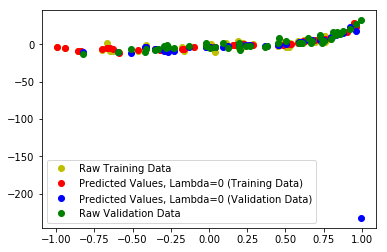

Training Data MSE:
6.4750601542578305
Validation Data MSE:
1415.7667845050064


In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_file(fp):
    """
    Read in a csv file and return numpy arrays for x and y values.
    :param fp:
    :return:
    """
    x = []
    y = []
    with open(fp, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return np.array(x), np.array(y)


def exponential(x, deg):
    """
    Constructs polynomial matrix from input vector.
    """
    matrix = []
    for i in x:
        list = []
        for j in range(deg+1):
            list.append(i ** j)
        matrix.append(list)
    matrix = np.array(matrix)
    return matrix


def computeparametres(x, y, lmb, deg):
    """
    Fit data into a polynomial and calculate the co-effecients (model parametres)
    :param x:
    :param y:
    :param lmb:
    :param deg:
    :return:
    """
    X = exponential(x, deg)
    Y = np.array(y)
    I = np.identity(deg+1)
    W = np.dot(np.linalg.inv((np.dot(np.matrix.transpose(X), X) + lmb * I)), (np.dot(np.matrix.transpose(X), Y)))
    return W


def y_predict_set(w, x):
    """
    Predict y values for the given exponentiated x matrix.
    :param w:
    :param x:
    :return:
    """
    y = [ y_predict_value(w, i) for i in x ]
    return np.array(y)


def y_predict_value(w, x):
    """
    Predict y value for the given x row.
    :param w:
    :param x:
    :return:
    """
    return np.dot(w,x)


def computeMSE(ypred, y):
    """
    Compute the mean squared error between two data vectors.
    :param ypred:
    :param y:
    :return:
    """
    return np.square(np.subtract(ypred,y)).mean()


if __name__ == '__main__':
    x_train, y_train = read_file('data/Dataset_1_train.csv')

    plt.plot(x_train, y_train, 'yo')
    w_train = computeparametres(x_train, y_train, 0, 20)
    plt.plot(x_train, y_predict_set(w_train,exponential(x_train, 20)), 'ro')

    x_valid, y_valid = read_file('data/Dataset_1_valid.csv')
    plt.plot(x_valid, y_predict_set(w_train, exponential(x_valid, 20)), 'bo')
    plt.plot(x_valid, y_valid, 'go')
    plt.legend(["Raw Training Data", "Predicted Values, Lambda=0 (Training Data)", "Predicted Values, Lambda=0 (Validation Data)", "Raw Validation Data"])

    plt.show()

    print("Training Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_train, 20)), y_train))
    print("Validation Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_valid, 20)), y_valid))

### Question 2.2 - L2 Regularization:
**Without validation predictions:**

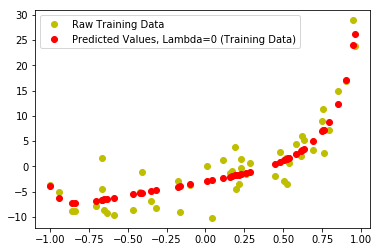

Training Data MSE:
9.20504017090436
Validation Data MSE:
9.699253211677858


In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_file(fp):
    """
    Read in a csv file and return numpy arrays for x and y values.
    :param fp:
    :return:
    """
    x = []
    y = []
    with open(fp, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return np.array(x), np.array(y)


def exponential(x, deg):
    """
    Constructs polynomial matrix from input vector.
    """
    matrix = []
    for i in x:
        list = []
        for j in range(deg+1):
            list.append(i ** j)
        matrix.append(list)
    matrix = np.array(matrix)
    return matrix


def computeparametres(x, y, lmb, deg):
    """
    Fit data into a polynomial and calculate the co-effecients (model parametres)
    :param x:
    :param y:
    :param lmb:
    :param deg:
    :return:
    """
    X = exponential(x, deg)
    Y = np.array(y)
    I = np.identity(deg+1)
    W = np.dot(np.linalg.inv((np.dot(np.matrix.transpose(X), X) + lmb * I)), (np.dot(np.matrix.transpose(X), Y)))
    return W


def y_predict_set(w, x):
    """
    Predict y values for the given exponentiated x matrix.
    :param w:
    :param x:
    :return:
    """
    y = [ y_predict_value(w, i) for i in x ]
    return np.array(y)


def y_predict_value(w, x):
    """
    Predict y value for the given x row.
    :param w:
    :param x:
    :return:
    """
    return np.dot(w,x)


def computeMSE(ypred, y):
    """
    Compute the mean squared error between two data vectors.
    :param ypred:
    :param y:
    :return:
    """
    return np.square(np.subtract(ypred,y)).mean()


if __name__ == '__main__':
    x_train, y_train = read_file('data/Dataset_1_train.csv')

    plt.plot(x_train, y_train, 'yo')
    w_train = computeparametres(x_train, y_train, 1, 20)
    plt.plot(x_train, y_predict_set(w_train,exponential(x_train, 20)), 'ro')

    x_valid, y_valid = read_file('data/Dataset_1_valid.csv')
    plt.legend(["Raw Training Data", "Predicted Values, Lambda=0 (Training Data)"])

    plt.show()

    print("Training Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_train, 20)), y_train))
    print("Validation Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_valid, 20)), y_valid))



**With validation predictions:**

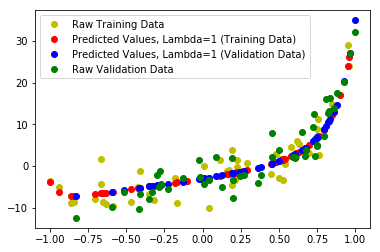

Training Data MSE:
9.20504017090436
Validation Data MSE:
9.699253211677858


In [7]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_file(fp):
    """
    Read in a csv file and return numpy arrays for x and y values.
    :param fp:
    :return:
    """
    x = []
    y = []
    with open(fp, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return np.array(x), np.array(y)


def exponential(x, deg):
    """
    Constructs polynomial matrix from input vector.
    """
    matrix = []
    for i in x:
        list = []
        for j in range(deg+1):
            list.append(i ** j)
        matrix.append(list)
    matrix = np.array(matrix)
    return matrix


def computeparametres(x, y, lmb, deg):
    """
    Fit data into a polynomial and calculate the co-effecients (model parametres)
    :param x:
    :param y:
    :param lmb:
    :param deg:
    :return:
    """
    X = exponential(x, deg)
    Y = np.array(y)
    I = np.identity(deg+1)
    W = np.dot(np.linalg.inv((np.dot(np.matrix.transpose(X), X) + lmb * I)), (np.dot(np.matrix.transpose(X), Y)))
    return W


def y_predict_set(w, x):
    """
    Predict y values for the given exponentiated x matrix.
    :param w:
    :param x:
    :return:
    """
    y = [ y_predict_value(w, i) for i in x ]
    return np.array(y)


def y_predict_value(w, x):
    """
    Predict y value for the given x row.
    :param w:
    :param x:
    :return:
    """
    return np.dot(w,x)


def computeMSE(ypred, y):
    """
    Compute the mean squared error between two data vectors.
    :param ypred:
    :param y:
    :return:
    """
    return np.square(np.subtract(ypred,y)).mean()


if __name__ == '__main__':
    x_train, y_train = read_file('data/Dataset_1_train.csv')

    plt.plot(x_train, y_train, 'yo')
    w_train = computeparametres(x_train, y_train, 1, 20)
    plt.plot(x_train, y_predict_set(w_train,exponential(x_train, 20)), 'ro')

    x_valid, y_valid = read_file('data/Dataset_1_valid.csv')
    plt.plot(x_valid, y_predict_set(w_train, exponential(x_valid, 20)), 'bo')
    plt.plot(x_valid, y_valid, 'go')
    plt.legend(["Raw Training Data", "Predicted Values, Lambda=1 (Training Data)", "Predicted Values, Lambda=1 (Validation Data)", "Raw Validation Data"])

    plt.show()

    print("Training Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_train, 20)), y_train))
    print("Validation Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_valid, 20)), y_valid))



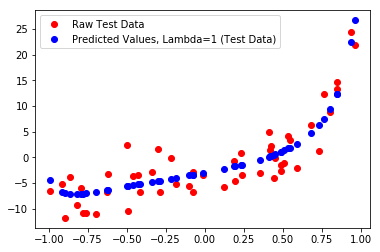

Training Data MSE:
9.20504017090436
Validation Data MSE:
9.699253211677858
Testing Data MSE:
128.56429805939945


In [8]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_file(fp):
    """
    Read in a csv file and return numpy arrays for x and y values.
    :param fp:
    :return:
    """
    x = []
    y = []
    with open(fp, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(float(row[0]))
            y.append(float(row[1]))
    return np.array(x), np.array(y)


def exponential(x, deg):
    """
    Constructs polynomial matrix from input vector.
    """
    matrix = []
    for i in x:
        list = []
        for j in range(deg+1):
            list.append(i ** j)
        matrix.append(list)
    matrix = np.array(matrix)
    return matrix


def computeparametres(x, y, lmb, deg):
    """
    Fit data into a polynomial and calculate the co-effecients (model parametres)
    :param x:
    :param y:
    :param lmb:
    :param deg:
    :return:
    """
    X = exponential(x, deg)
    Y = np.array(y)
    I = np.identity(deg+1)
    W = np.dot(np.linalg.inv((np.dot(np.matrix.transpose(X), X) + lmb * I)), (np.dot(np.matrix.transpose(X), Y)))
    return W


def y_predict_set(w, x):
    """
    Predict y values for the given exponentiated x matrix.
    :param w:
    :param x:
    :return:
    """
    y = [ y_predict_value(w, i) for i in x ]
    return np.array(y)


def y_predict_value(w, x):
    """
    Predict y value for the given x row.
    :param w:
    :param x:
    :return:
    """
    return np.dot(w,x)


def computeMSE(ypred, y):
    """
    Compute the mean squared error between two data vectors.
    :param ypred:
    :param y:
    :return:
    """
    return np.square(np.subtract(ypred,y)).mean()


if __name__ == '__main__':
    x_train, y_train = read_file('data/Dataset_1_train.csv')

    w_train = computeparametres(x_train, y_train, 1, 20)

    x_valid, y_valid = read_file('data/Dataset_1_valid.csv')


    x_test, y_test = read_file('data/Dataset_1_test.csv')
    plt.plot(x_test, y_test, 'ro')
    plt.plot(x_test, y_predict_set(w_train, exponential(x_test, 20)), 'bo')
    plt.legend(["Raw Test Data", "Predicted Values, Lambda=1 (Test Data)"])

    plt.show()

    print("Training Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_train, 20)), y_train))
    print("Validation Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_valid, 20)), y_valid))
    print("Testing Data MSE:")
    print(computeMSE(y_predict_set(w_train, exponential(x_valid, 20)), y_test))

